<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Électrostatique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Calcul et représentation des champs électrostatiques
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt


# Champs électrostatiques : charges ponctuelles

Le calcul d'un champ électrostatique $\overrightarrow{E}$, ou celui d'un potentiel $V$, généré en $M$ par une charge ponctuelle placée en $O$ se fait à l'aide de la relation :
$$\vec{E}=\dfrac{q}{4\pi\epsilon_0}\dfrac{\overrightarrow{OM}}{OM^3}$$

&nbsp;
Le principe de superposition permet alors de combiner les champs générés par diverses sources.

In [2]:
# Données générales
pos = 3.0e-6 # position des sources
q_e = 1.6e-19 # charge de la source
epsilon0 = 36*np.pi*1e-9
k = 1/(4*np.pi*epsilon0)

# Maillage de représentation des vecteurs
nd=70 # nombre de points sur un axe
if nd%2!=0 :
    nd+=1 # nd doit être pair pour éviter le point (0,0)
data=np.linspace(-2*pos,2*pos,nd) 
x,y = np.meshgrid( data,data )

q0,x0,y0 = 100*q_e, 0*np.ones(nd), 0*np.ones(nd) # charge centrale
q1,x1,y1 = 100*q_e, -pos*np.ones(nd), pos*np.ones(nd) # en haut à gauche
q2,x2,y2 = 100*q_e, pos*np.ones(nd), pos*np.ones(nd) # en haut à droite
q3,x3,y3 = 100*q_e, -pos*np.ones(nd), -pos*np.ones(nd) # en bas à gauche
q4,x4,y4 = 100*q_e, pos*np.ones(nd), -pos*np.ones(nd) # en bas à droite

# calcul des distances entre point du maillage et source
r0=np.sqrt((x-x0)**2+(y-y0)**2)
r1=np.sqrt((x-x1)**2+(y-y1)**2)
r2=np.sqrt((x-x2)**2+(y-y2)**2)
r3=np.sqrt((x-x3)**2+(y-y3)**2)
r4=np.sqrt((x-x4)**2+(y-y4)**2)

# calcul du potentiel et du champ électrique

V=k*(q0/r0 + q1/r1 + q2/r2 + q3/r3 + q4/r4) # potentiel électrique
# composantes du champ électrique
Ex = k*((q0/r0**3)*(x-x0)+(q1/r1**3)*(x-x1)+(q2/r2**3)*(x-x2)+(q3/r3**3)*(x-x3)+(q4/r4**3)*(x-x4))
Ey = k*((q0/r0**3)*(y-y0)+(q1/r1**3)*(y-y1)+(q2/r2**3)*(y-y2)+(q3/r3**3)*(y-y3)+(q4/r4**3)*(y-y4))
# norme du champ électrique
E_norm  = (np.sqrt(Ex**2 + Ey**2))
# les vecteurs ont des normes très différentes et on les normalise pour les rendre visibles
ExN = Ex/E_norm
EyN = Ey/E_norm


skip = (slice(None, None, 3), slice(None, None, 3)) # On ne trace qu'un vecteur sur deux

# code couleur pour les charges (rouge si q>0, bleue si q<0, noir si q=0)
if q0>0 :
    c0='r'
elif q0<0 :
    c0='b'
else :
    c0='white'
if q1>0 :
    c1='r'
elif q1<0 :
    c1='b'
else :
    c1='white'
if q2>0 :
    c2='r'
elif q2<0 :
    c2='b'
else :
    c2='white'
if q3>0 :
    c3='r'
elif q3<0 :
    c3='b'
else :
    c3='white'
if q4>0 :
    c4='r'
elif q4<0 :
    c4='b'
else :
    c4='white'

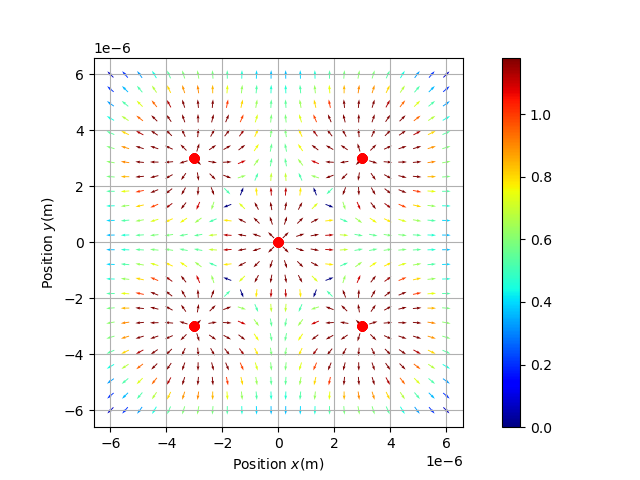

In [3]:
# Champ de vecteurs    
plt.figure("Vecteurs")

plt.plot(x0,y0,'o',color=c0)
plt.plot(x1,y1,'o',color=c1)
plt.plot(x2,y2,'o',color=c2)
plt.plot(x3,y3,'o',color=c3)
plt.plot(x4,y4,'o',color=c4)

plt.xlim(-2*pos,2*pos)
plt.ylim(-2*pos,2*pos)

plt.quiver(x[skip],y[skip],ExN[skip],EyN[skip],np.log(E_norm[skip]),pivot='middle', cmap = plt.cm.jet, headlength = 5)

plt.grid(True)

plt.colorbar()
plt.clim(0,np.mean(np.log(E_norm[skip])))

plt.xlabel(r'Position $x$(m)')
plt.ylabel(r'Position $y$(m)')

plt.axis('scaled')
plt.show()

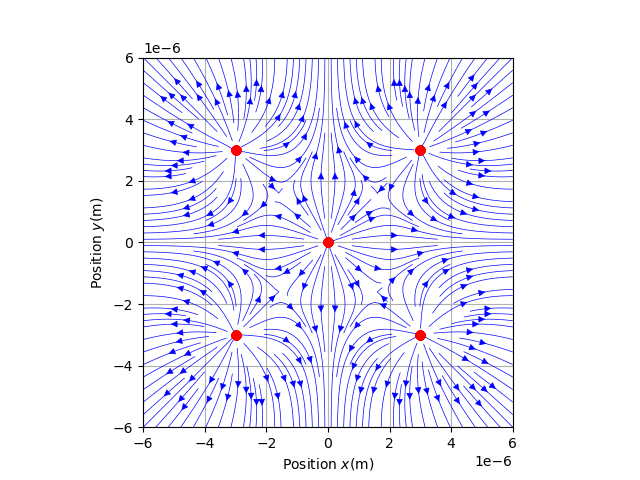

In [4]:
## Lignes de champ
plt.figure("Lignes de champ")

plt.plot(x0,y0,'o',color=c0)
plt.plot(x1,y1,'o',color=c1)
plt.plot(x2,y2,'o',color=c2)
plt.plot(x3,y3,'o',color=c3)
plt.plot(x4,y4,'o',color=c4)

plt.xlim(-2*pos,2*pos)
plt.ylim(-2*pos,2*pos)

plt.streamplot(x, y, ExN, EyN, density=2,linewidth=.5, color='b')
# plt.contour(x,y,V,50,colors='black') # décommenter pour tracer les lignes iso-V 

plt.grid(True)

plt.xlabel(r'Position $x$(m)')
plt.ylabel(r'Position $y$(m)')

plt.axis('scaled')
plt.show()

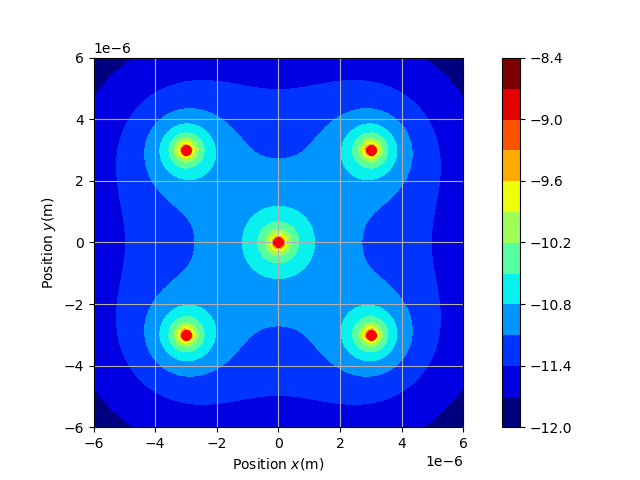

In [5]:
## Contours de potentiels
plt.figure("Contours")
if c0 != 'white':
    plt.plot(x0,y0,'o',color=c0)
if c1 != 'white':
    plt.plot(x1,y1,'o',color=c1)
if c2 != 'white':
    plt.plot(x2,y2,'o',color=c2)
if c3 != 'white':
    plt.plot(x3,y3,'o',color=c3)
if c4 != 'white':
    plt.plot(x4,y4,'o',color=c4)
    
plt.xlim(-2*pos,2*pos)
plt.ylim(-2*pos,2*pos)

plt.contourf(x,y,np.log(V),10,cmap=plt.cm.jet, vmin=np.log(V).min(), vmax=np.log(V).max())
plt.colorbar()
#plt.contour(x,y,V,10,colors='gray')

plt.grid(True)

plt.xlabel(r'Position $x$(m)')
plt.ylabel(r'Position $y$(m)')

plt.axis('scaled')
plt.show()

## Champs électrostatiques : équation de Poisson
Les équations de Maxwell en régime stationnaire permettent d'établir l'équation de Poisson :
$$\Delta V = -\dfrac{\rho}{\epsilon_0}$$

&nbsp;
Une méthode numérique dite &laquo;de relaxation&raquo; permet de calculer ce champ par une méthode itérative qui s'appuie sur les valeurs aux frontières imposées par l'opérateur. Dans sa version actuelle le script n'a pas de référence géométrique, et ne permet pas facilement de déplacer les électrodes du condensateur.

In [6]:
# Bornes géométriques du domaine
N = 180

V = np.zeros((N,N))
V0 = .1

M=int(round(N/3,0))

def cond_lim(V):
    for i in range(M):
        V[M+int(N/10),M+i]=V0
        V[2*M-int(N/10),M+i]=-V0
    for i in range(N):
        V[i,0]=0
        V[0,i]=0

def iterate(V) :
    for i in range(1,N-1):
        for j in range(1,N-1):
            V[i,j]=(V[i-1,j]+V[i+1,j]+V[i,j+1]+V[i,j-1])/4
    
res = 1
compteur = 0

while (abs(res)>1e-5 and compteur < 10000) :
    old = np.copy(V)
    iterate(V)
    cond_lim(V)
    compteur+=1
    res=np.max(np.abs(V-old))

print(compteur, res)

1538 9.992772877838452e-06


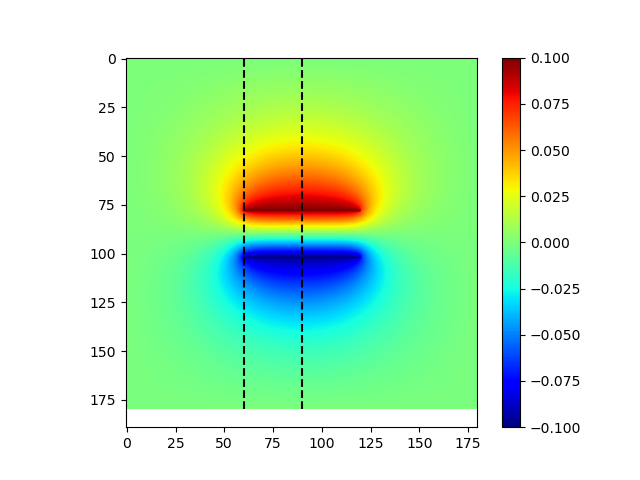

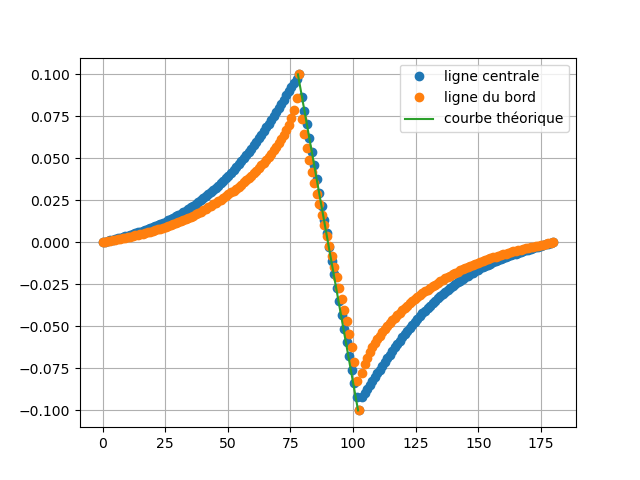

9.992772877838452e-06 1538


In [7]:
plt.figure()
plt.imshow(V, cmap=plt.cm.jet)
plt.plot([int(N/2), int(N/2)],[0,N],'c--', color='black')
plt.plot([int(N/3), int(N/3)],[0,N],'c--', color='black')
plt.colorbar()
plt.show()

plt.figure()
plt.plot(np.linspace(0,N,N),V[:,int(N/2)],'o', label='ligne centrale')
plt.plot(np.linspace(0,N,N),V[:,int(N/3)],'o', label='ligne du bord')
plt.plot(np.linspace(M+int(N/10),2*M-int(N/10),N),np.linspace(V0,-V0,N), label='courbe théorique')
plt.legend()
plt.grid(True)
plt.show()

print(res, compteur)